<h1 style="text-align: center;font-size: 36px;color:darkblue;">Modeling</h1>

# Imports

In [1]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as pyplot
import os
import pickle
import keras
import tensorflow
from sklearn.metrics import confusion_matrix,classification_report
from keras.utils.vis_utils import plot_model
import seaborn

# Configurations

In [2]:
# %matplotlib qt;
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (5, 3)

In [6]:
Training_Data_Path="../Data/Main_Data/train/"
Testing_Data_Path="../Data/Main_Data/valid/"

In [7]:
Object_Data_Path="../Data/Preprocessed_Data/"

In [8]:
class_list=os.listdir(Training_Data_Path)

In [9]:
class_list

['XR_ELBOW',
 'XR_FINGER',
 'XR_FOREARM',
 'XR_HAND',
 'XR_HUMERUS',
 'XR_SHOULDER',
 'XR_WRIST']

In [10]:
input_dimension=(224, 224, 1)

### Functions

In [11]:
def getClassificationEvaluation(actuals:list,predictions:list,labels:list):
    classification_data=confusion_matrix(
    [labels[i] for i in actuals],
    [labels[numpy.argmax(prediction)] for prediction in predictions]
    )
    seaborn.heatmap(classification_data,annot=True,xticklabels=labels, yticklabels=labels)
    pyplot.show()
    print(classification_report(
    [labels[i] for i in actuals],
    [labels[numpy.argmax(prediction)] for prediction in predictions]
    ))

# Data Import

In [13]:
class_=""
pickle_training_features=open(Object_Data_Path+"/"+class_+"/pickle_training_features_1.pickle","rb")
Training_Features=pickle.load(pickle_training_features)
pickle_training_features.close()
pickle_training_labels=open(Object_Data_Path+"/"+class_+"/pickle_training_labels_1.pickle","rb")
Training_Labels=pickle.load(pickle_training_labels)
pickle_training_labels.close()
pickle_testing_features=open(Object_Data_Path+"/"+class_+"/pickle_testing_features_1.pickle","rb")
Testing_Features=pickle.load(pickle_testing_features)
pickle_testing_features.close()
pickle_testing_labels=open(Object_Data_Path+"/"+class_+"/pickle_testing_labels_1.pickle","rb")
Testing_Labels=pickle.load(pickle_testing_labels)
pickle_testing_labels.close()

In [14]:
Training_Features.shape,Training_Labels.shape

((1400, 224, 224), (1400,))

In [15]:
Testing_Features.shape

(709, 224, 224)

# Model Implementaion

In [24]:
Training_Features=numpy.expand_dims(Training_Features,axis=-1)
Testing_Features=numpy.expand_dims(Testing_Features,axis=-1)

In [25]:
Training_Features.shape

(1400, 224, 224, 1)

In [26]:
Testing_Features.shape

(709, 224, 224, 1)

In [40]:
Total_Testing_Features=numpy.concatenate((Training_Features,Testing_Features))
Total_Testing_Labels=numpy.concatenate((Training_Labels,Testing_Labels))

In [41]:
Total_Testing_Features.shape,Total_Testing_Labels.shape

((2109, 224, 224, 1), (2109,))

In [18]:
input_dimension

(224, 224, 1)

### Model Definition

In [28]:
Model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=input_dimension),
    keras.layers.MaxPooling2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=16, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Reshape((162,128)),
    keras.layers.LSTM(128,return_sequences=True),
    keras.layers.LSTM(64,return_sequences=True),
    keras.layers.Flatten(),
    keras.layers.Dense(units=512, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=len(class_list), activation='softmax')
    ]
 )

In [29]:
Model

In [30]:
Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 16)       0         
 2D)                                                             
                                                                 
 reshape_2 (Reshape)         (None, 162, 128)          0         
                                                                 
 lstm_4 (LSTM)               (None, 162, 128)         

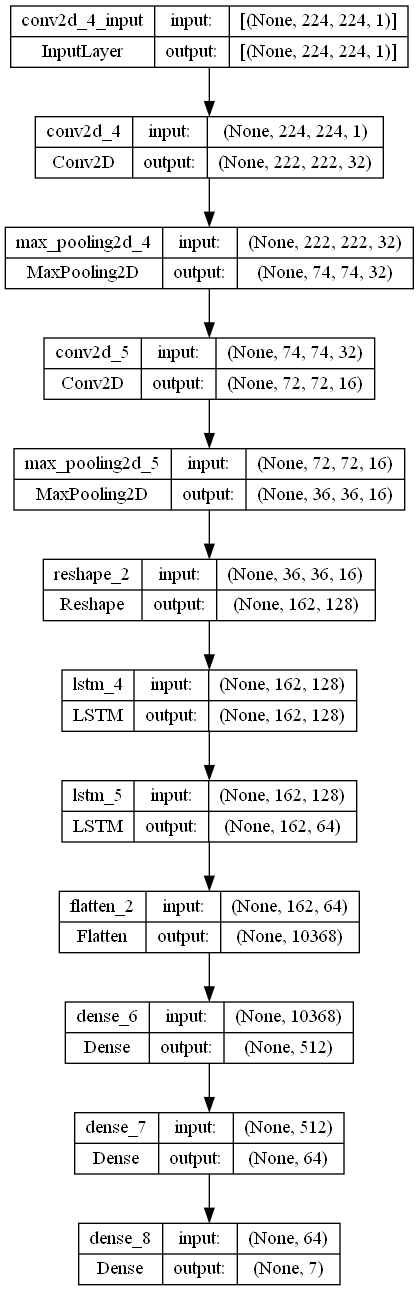

In [31]:
plot_model(Model, to_file='./Graphs/defined_model_1_plot.png', show_shapes=True, show_layer_names=True)

In [32]:
Model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model Building

In [47]:
Model.fit(
    Training_Features,Training_Labels,
    epochs=2,
    verbose=1,
    validation_data=(Testing_Features,Testing_Labels)
)

Epoch 1/2
44/44 [==============================] - 77s 2s/step - loss: 0.0592 - accuracy: 0.9850 - val_loss: 1.5066 - val_accuracy: 0.6573
Epoch 2/2
44/44 [==============================] - 69s 2s/step - loss: 0.0547 - accuracy: 0.9864 - val_loss: 1.4324 - val_accuracy: 0.7010


### Model Evaluation

In [62]:
Model=tensorflow.keras.models.load_model("../Model/DefinedModel.h5")

#### Training Evaluation

In [48]:
Training_Predictions=Model.predict(Training_Features)

44/44 [==============================] - 9s 211ms/step


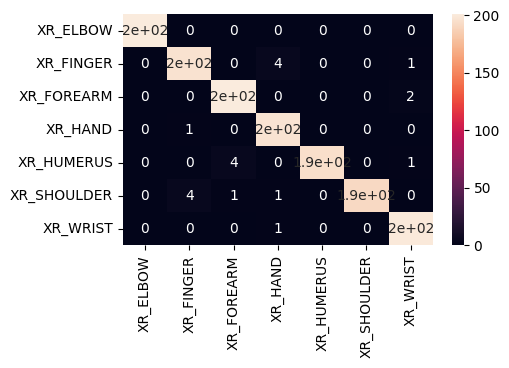

              precision    recall  f1-score   support

    XR_ELBOW       1.00      1.00      1.00       201
   XR_FINGER       0.98      0.98      0.98       201
  XR_FOREARM       0.98      0.99      0.98       203
     XR_HAND       0.97      0.99      0.98       198
  XR_HUMERUS       1.00      0.97      0.99       199
 XR_SHOULDER       1.00      0.97      0.98       197
    XR_WRIST       0.98      1.00      0.99       201

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400



In [49]:
getClassificationEvaluation(Training_Labels,Training_Predictions,class_list)

# Training Accuracy: 99%

#### Testing Evaluation

In [50]:
Testing_Predictions=Model.predict(Testing_Features)

23/23 [==============================] - 5s 239ms/step


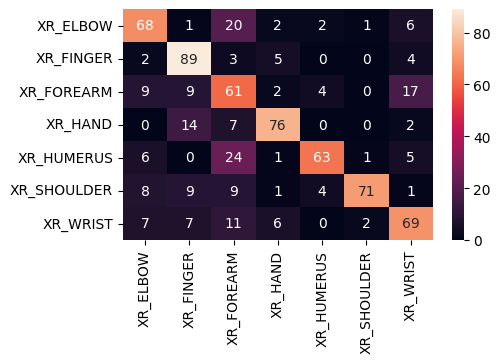

              precision    recall  f1-score   support

    XR_ELBOW       0.68      0.68      0.68       100
   XR_FINGER       0.69      0.86      0.77       103
  XR_FOREARM       0.45      0.60      0.51       102
     XR_HAND       0.82      0.77      0.79        99
  XR_HUMERUS       0.86      0.63      0.73       100
 XR_SHOULDER       0.95      0.69      0.80       103
    XR_WRIST       0.66      0.68      0.67       102

    accuracy                           0.70       709
   macro avg       0.73      0.70      0.71       709
weighted avg       0.73      0.70      0.71       709



In [51]:
getClassificationEvaluation(Testing_Labels,Testing_Predictions,class_list)

# Testing Accuracy: 99%

#### Overall Testing 

In [52]:
Total_Testing_Predictions=Model.predict(Total_Testing_Features)

66/66 [==============================] - 16s 248ms/step


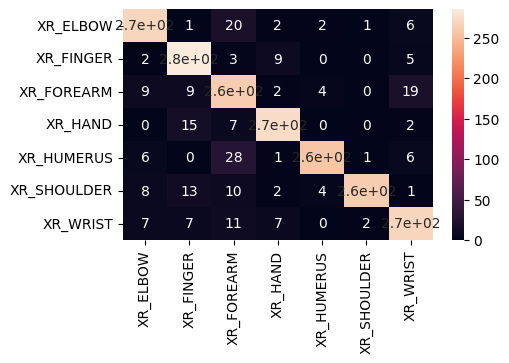

              precision    recall  f1-score   support

    XR_ELBOW       0.89      0.89      0.89       301
   XR_FINGER       0.86      0.94      0.90       304
  XR_FOREARM       0.77      0.86      0.81       305
     XR_HAND       0.92      0.92      0.92       297
  XR_HUMERUS       0.96      0.86      0.91       299
 XR_SHOULDER       0.98      0.87      0.93       300
    XR_WRIST       0.87      0.89      0.88       303

    accuracy                           0.89      2109
   macro avg       0.90      0.89      0.89      2109
weighted avg       0.90      0.89      0.89      2109



In [53]:
getClassificationEvaluation(Total_Testing_Labels,Total_Testing_Predictions,class_list)

# Total Accuracy: 89%

#### Saving Temporary Model

In [54]:
Model.save("./Models/DefinedModel.h5")

### Model Saving

In [55]:
Model.save("../Model/DefinedModel.h5")